## LSTM : IMDB 예제 - 기존에는 87%

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_features=10000
maxlen = 100
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=maxlen) # [0,0,0,3,5,7]
x_test = pad_sequences(x_test, maxlen=maxlen)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GRU, LSTM, SimpleRNN

- SimpleRNN

In [3]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 212s 1s/step - loss: 0.6879 - acc: 0.5342 - val_loss: 0.5497 - val_acc: 0.7322
Epoch 2/10
157/157 [==============================] - 189s 1s/step - loss: 0.4736 - acc: 0.7930 - val_loss: 0.4013 - val_acc: 0.8238
Epoch 3/10
157/157 [==============================] - 192s 1s/step - loss: 0.3019 - acc: 0.8827 - val_loss: 0.5395 - val_acc: 0.7972
Epoch 4/10
157/157 [==============================] - 192s 1s/step - loss: 0.2075 - acc: 0.9209 - val_loss: 0.4750 - val_acc: 0.8044
Epoch 5/10
157/157 [==============================] - 178s 1s/step - loss: 0.1256 - acc: 0.9563 - val_loss: 0.5374 - val_acc: 0.7820
Epoch 6/10
157/157 [==============================] - 171s 1s/step - loss: 0.0690 - acc: 0.9798 - val_loss: 0.6384 - val_acc: 0.7798
Epoch 7/10
157/157 [==============================] - 156s 992ms/step - loss: 0.0366 - acc: 0.9904 - val_loss: 0.6141 - val_acc: 0.8188
Epoch 8/10
157/157 [==============================] - 30717s 197s/

- LSTM

In [4]:
model = Sequential()
model.add(Embedding(max_features+1, 32, input_length=maxlen))
model.add(LSTM(32))
#model.add(LSTM(32, return_sequences=True))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 32)           320032    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 328,385
Trainable params: 328,385
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 7s 9ms/step - loss: 0.5438 - acc: 0.7073 - val_loss: 0.3393 - val_acc: 0.8526
Epoch 2/10
625/625 [==============================] - 5s 8ms/step - loss: 0.2900 - acc: 0.8804 - val_loss: 0.3534 - val_acc: 0.8430
Epoch 3/10
625/625 [==============================] - 5s 8ms/step - loss: 0.2505 - acc: 0.8988 - val_loss: 0.3751 - val_acc: 0.8482
Epoch 4/10
625/625 [==============================] - 5s 8ms/step - loss: 0.2243 - acc: 0.9138 - val_loss: 0.3445 - val_acc: 0.8576
Epoch 5/10
625/625 [==============================] - 5s 8ms/step - loss: 0.2009 - acc: 0.9223 - val_loss: 0.3876 - val_acc: 0.8428
Epoch 6/10
625/625 [==============================] - 5s 8ms/step - loss: 0.1969 - acc: 0.9238 - val_loss: 0.3468 - val_acc: 0.8546
Epoch 7/10
625/625 [==============================] - 5s 8ms/step - loss: 0.1723 - acc: 0.9367 - val_loss: 0.3484 - val_acc: 0.8576
Epoch 8/10
625/625 [==============================] - 5s 8ms/step - loss: 0.

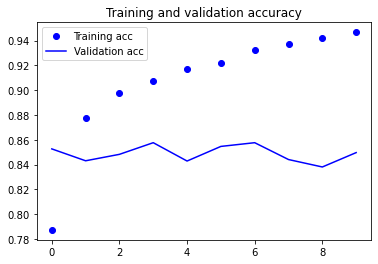

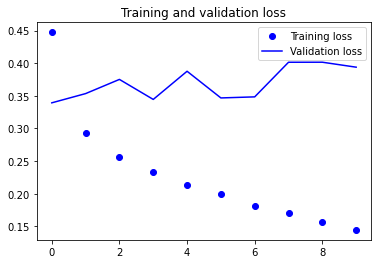

In [6]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()